In [1]:
## Importing essential libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
sd=pd.read_csv("stroke_data.csv")

In [3]:
sd.shape

(4981, 11)

In [6]:
sd.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
sd.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [8]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
sd.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
sd.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [15]:
sd.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [17]:
sd.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


In [18]:
sd.gender.value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [20]:
sd['gender'] = sd['gender'].apply(lambda x : 0 if x == 'Female' else 1)

In [21]:
sd['ever_married'].apply(lambda x : 0 if x == 'No' else 1).unique()

array([1, 0], dtype=int64)

In [22]:
sd['Residence_type'].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [24]:
sd['Residence_type'] = sd['Residence_type'].apply(lambda x : 0 if x == 'Rural' else 1)

In [26]:
sd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,1,186.21,29.0,formerly smoked,1


<AxesSubplot:xlabel='gender', ylabel='age'>

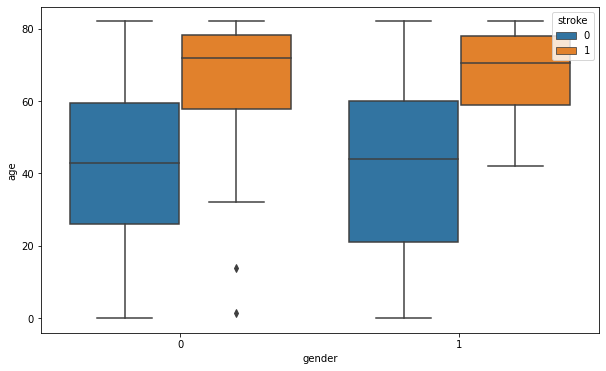

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(data = sd , x = 'gender' , y = 'age',hue = 'stroke')

<AxesSubplot:>

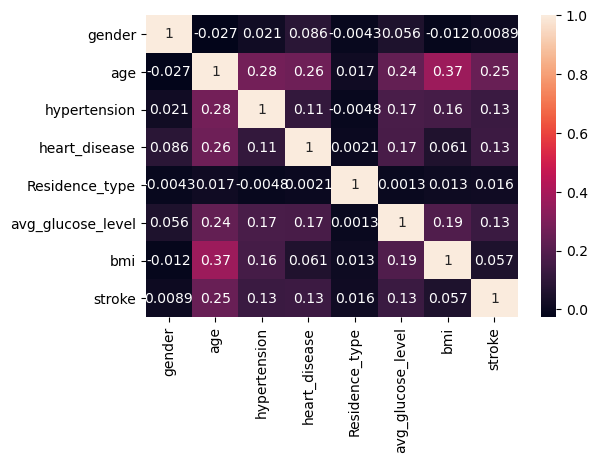

In [30]:
plt.figure(figsize = (6,4),dpi = 100)
sns.heatmap(sd.corr(),annot = True)

In [32]:
## here we convert gender column categorical to numerical
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sd.work_type = le.fit_transform(sd.work_type)
sd.ever_married = le.fit_transform(sd.ever_married)
sd.smoking_status = le.fit_transform(sd.smoking_status)

In [33]:
sd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


### Data split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x=sd.drop('stroke',axis=1)
y=sd['stroke']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [37]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (3984, 10)
y_train (3984,)
x_test (997, 10)
y_test (997,)


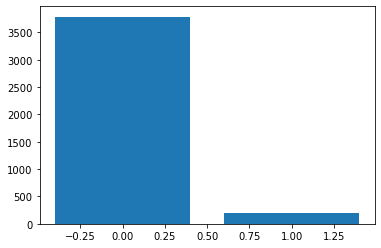

In [38]:
plt.bar(x = y_train.value_counts().index, height = y_train.value_counts().values);

### KNN classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
acc=[]
k=[]
error=[]
for i in range(1,10):
    k.append(i)
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    tab_1=confusion_matrix(y_pred,y_test)
    acc.append(tab_1.diagonal().sum()/tab_1.sum())
    error.append(1-tab_1.diagonal().sum()/tab_1.sum())

In [41]:
knn = pd.DataFrame({"k":k,"Accuracy":acc,'Error':error})
knn

,k,Accuracy,Error
0,1,0.906720,0.093280
1,2,0.949850,0.050150
2,3,0.940822,0.059178
3,4,0.948847,0.051153
4,5,0.948847,0.051153
5,6,0.949850,0.050150
6,7,0.949850,0.050150
7,8,0.949850,0.050150
8,9,0.948847,0.051153


Text(0, 0.5, 'error')

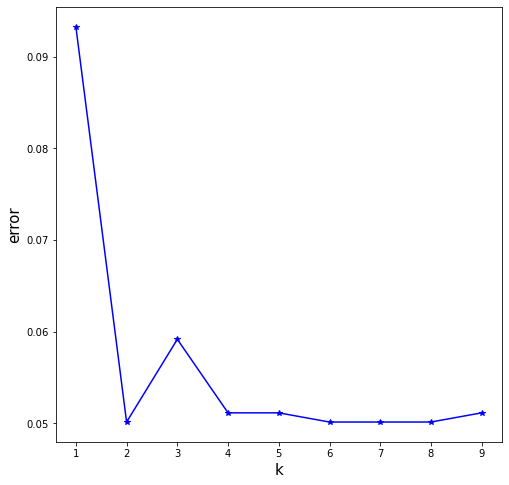

In [42]:
plt.figure(figsize=(8,8))
plt.plot(k,error,color="b",marker="*")
plt.xlabel('k',size =15)
plt.ylabel('error',size =15)

Here the error is minimum at 2, so we will take k value as 2.

In [43]:
model=KNeighborsClassifier(2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [44]:
## Here command to find Accuracy.
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred , y_test)
Accuracy

0.9498495486459378

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [46]:
## Confusion matrix is used to see performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[947   0]
 [ 49   1]]


In [47]:
## Here command to find Accuracy.
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred , y_test)
Accuracy

0.950852557673019

### SVM

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [49]:
## Confusion matrix is used to see performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[947   0]
 [ 50   0]]


In [50]:
## Here command to find Accuracy.
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred , y_test)
Accuracy

0.9498495486459378